In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, SparsePCA, PCA
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,KDTree, BallTree, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.DataFrame(pd.read_csv('Breast_cancer_data.csv'))
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
pd.isnull(df).sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

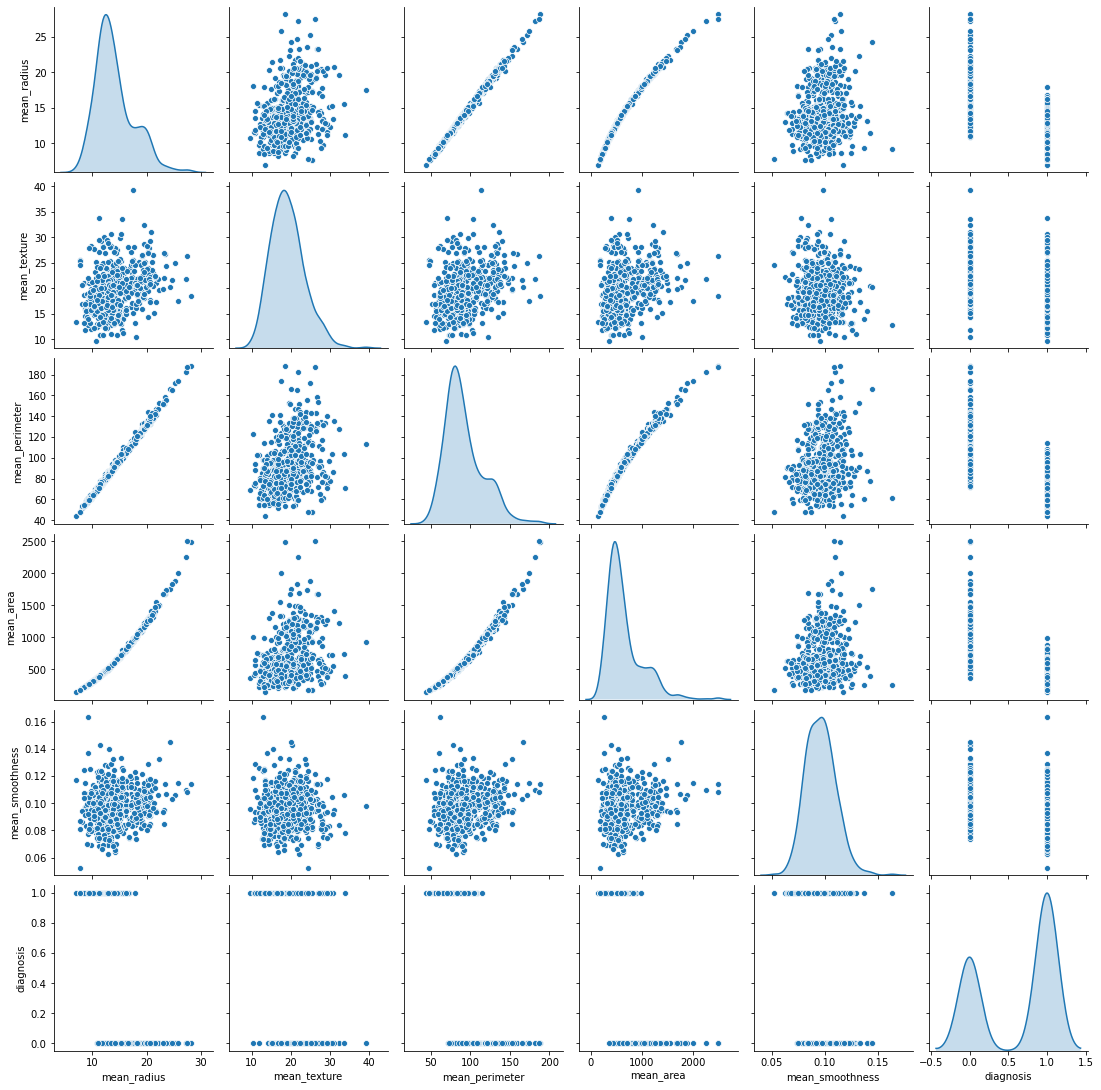

In [5]:
sns.pairplot(df, diag_kind='kde')

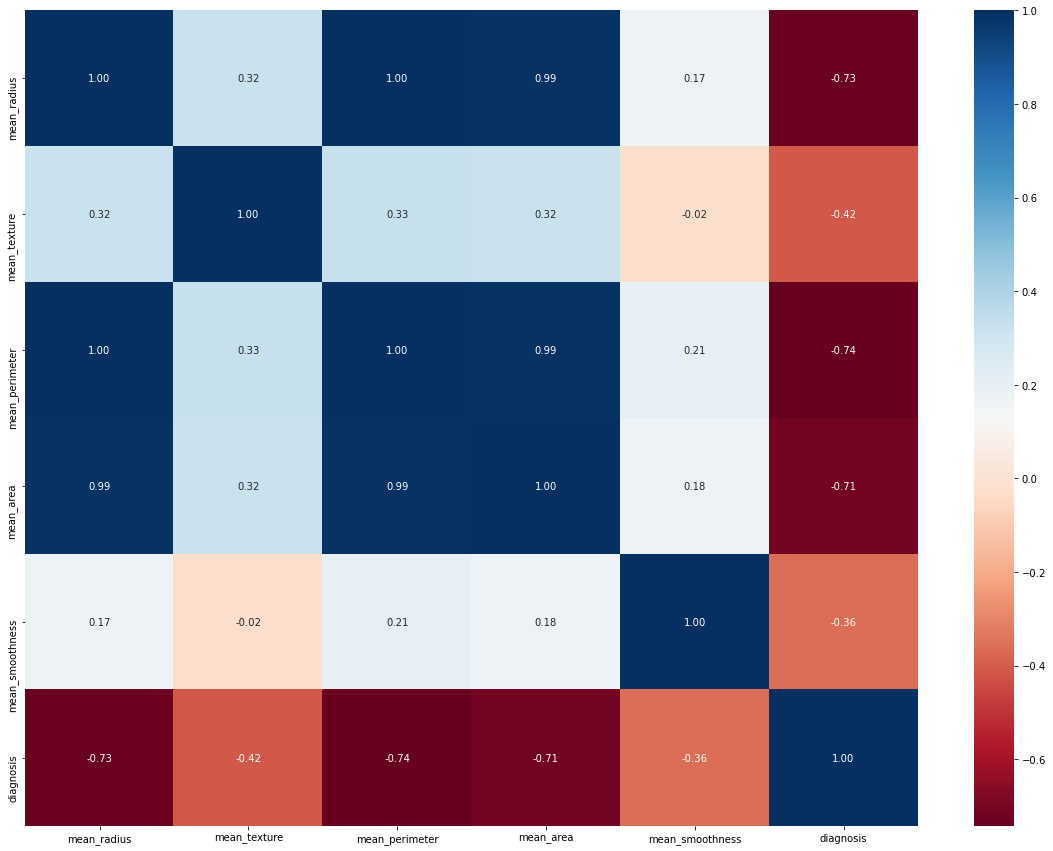

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='RdBu', annot=True, fmt='.2f')

In [7]:
print(round(df[df['diagnosis']==1].shape[0]/df.shape[0] * 100,2),'% of patients diognosed cancer')

62.74 % of patients diognosed cancer


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modelling without solving imbalance problem

In [10]:
estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  
              ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
              ('svc', SVC()),
              ('ada', AdaBoostClassifier()),
              ('etr', ExtraTreesClassifier(n_estimators=100)),
              ('gb', GradientBoostingClassifier())]
clf = StackingClassifier(estimators=estimators)

In [11]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_c

In [12]:
pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.94      0.96        89

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Modelling after solving imbalance problem

In [14]:
data2 = df[df.diagnosis==1]

In [15]:
new_x,drop_x,new_y,drop_y=train_test_split(data2.iloc[:,:-1],data2.iloc[:,-1], test_size=0.4, random_state=42)

In [16]:
data = pd.concat((pd.concat((new_x,new_y),axis=1), df[df.diagnosis==0]),axis=0)

In [17]:
data[data.diagnosis==1].shape[0]/data.shape[0]

0.5023474178403756

In [18]:
X2 = data.iloc[:,:-1]
y2 = data.iloc[:,-1]

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [20]:
estimators2 = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  
              ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
              ('svc', SVC()),
              ('ada', AdaBoostClassifier()),
              ('etr', ExtraTreesClassifier(n_estimators=100)),
              ('gb', GradientBoostingClassifier())]
clf2 = StackingClassifier(estimators=estimators)

In [21]:
clf2.fit(X_train2,y_train2)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_c

In [22]:
pred2 = clf2.predict(X_test2)

In [23]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.94      0.97        49

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



## Result: % Accuracy
### Conclusion: Solving imbalance problem increased accuracy by 1%.